In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurements_query = (session.query(Measurement.date, Measurement.prcp) \
                      .filter(Measurement.date <= '2017-08-23') \
                      .filter(Measurement.date >= '2016-08-23') \
                      .all())

for row in measurements_query:
    print(row)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-05-03', 0.0)
('2017-05-04', 0.0)
('2017-05-05', 0.0)
('2017-05-06', 0.0)
('2017-05-07', 0.0)
('2017-05-08', 0.0)
('2017-05-09', 0.68)
('2017-05-10', 0.06)
('2017-05-11', 0.0)
('2017-05-12', 0.0)
('2017-05-13', 0.0)
('2017-05-14', 0.0)
('2017-05-15', 0.06)
('2017-05-16', 0.0)
('2017-05-17', 0.0)
('2017-05-18', 0.46)
('2017-05-20', None)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-23', 0.0)
('2017-05-24', 0.61)
('2017-05-25', 0.55)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('2017-05-28', 0.0)
('2017-05-29', 0.0)
('2017-05-30', 0.11)
('2017-05-31', 0.0)
('2017-06-01', 0.0)
('2017-06-02', 0.0)
('2017-06-03', 0.15)
('2017-06-04', 0.0)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.0)
('2017-06-10', 0.13)
('2017-06-11', 0.25)
('2017-06-12', 0.14)
('2017-06-13', 0.03)
('2017-06-14', 0.06)
('2017-06-15', 0.0)
('2017-06-16', 0.0)
('2017-06-17', 0.0)
('2017-06-18', 0.0)
('2017-06-19', 0.01)
('2017-06-21', None)
('2017-06-22', 0.0)
('20

In [12]:
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc())
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = latest_date[0]

year_ago = dt.datetime.strptime(latest_date, "%Y-%m-%d")- dt.timedelta(days=366)
year_ago

datetime.datetime(2016, 8, 22, 0, 0)

In [13]:
# Perform a query to retrieve the data and precipitation scores
query1 = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=year_ago).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(query1, columns = ["Date", "Precipitation"])
precipitation_df["Date"] = pd.to_datetime(precipitation_df["Date"], format = "%Y-%m-%d")
precipitation_df.set_index("Date", inplace = True)

In [15]:
# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by="Date", ascending = True)
precipitation_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


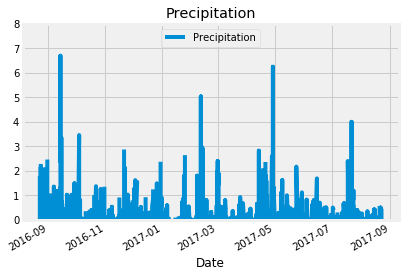

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(title="Precipitation")
plt.legend(loc="upper center")
plt.ylim(0,8)
plt.savefig("Images/Precipitation.png", bbox_inches="tight")
plt.show()

![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(Measurement.station).distinct().count()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.
stations_active = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = stations_active[0][0]
most_active_station

temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
temp_stats


[(54.0, 85.0, 71.66378066378067)]

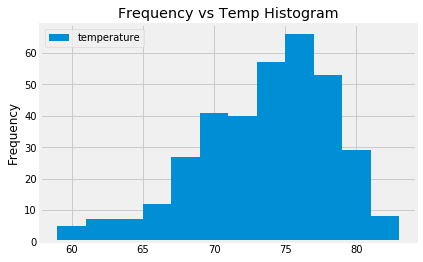

In [21]:
# Choose the station with the highest number of temperature observations.
station_most_tempstats = session.query(Measurement.station,func.count(Measurement.tobs)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).first()
station_most_tempstats = station_most_tempstats [0]
station_most_tempstats
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempstats_12months = session.query(Measurement.tobs).filter(Measurement.date>=year_ago).filter(Measurement.station == station_most_tempstats).all()

temperature_observation = pd.DataFrame(tempstats_12months, columns=["temperature"])

temperature_observation.plot.hist(bins=12, title = "Frequency vs Temp Histogram")
plt.savefig("Images/frequency.png", bbox_inches="tight")
plt.show()

![precipitation](Images/station-histogram.png)

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [46]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
last_years_temp = (calc_temps('2016-08-23', '2017-08-23'))
print(last_years_temp)

[(58.0, 74.59058295964125, 87.0)]


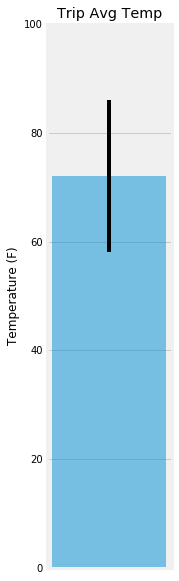

In [41]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin = last_years_temp[0][0]
tavg = last_years_temp[0][1]
tmax = last_years_temp[0][2]
ptp = tmax-tmin

plt.figure(figsize=(2,10))
plt.bar(0, height=tavg, yerr=ptp, alpha=0.5)
plt.title("Trip Avg Temp")
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temperature (F)")
plt.savefig("Trip_Avg_Temp.png")
plt.show()

In [66]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station,Station.name,func.sum(Measurement.prcp),Station.latitude,Station.longitude,Station.elevation]
Results = session.query(*sel).filter(Measurement.station==Station.station)\
                             .filter(Measurement.date>='2016-08-23')\
                             .filter(Measurement.date<='2017-08-23')\
                             .group_by(Measurement.station)\
                             .order_by(func.sum(Measurement.prcp).desc()).all()



print("Station Id\tStation Name\tTotal Rainfall\tLatitude\tLongitude\tElevation")
for x in Results: 
    print(x[0],"\t",x[1],"\t",x[2],"\t",x[3],"\t",x[4])




Station Id	Station Name	Total Rainfall	Latitude	Longitude	Elevation
USC00516128 	 MANOA LYON ARBO 785.2, HI US 	 147.81000000000006 	 21.3331 	 -157.8025
USC00519281 	 WAIHEE 837.5, HI US 	 70.03000000000003 	 21.45167 	 -157.84888999999998
USC00513117 	 KANEOHE 838.1, HI US 	 48.510000000000026 	 21.4234 	 -157.8015
USC00519523 	 WAIMANALO EXPERIMENTAL FARM, HI US 	 38.01 	 21.33556 	 -157.71139
USC00514830 	 KUALOA RANCH HEADQUARTERS 886.9, HI US 	 33.239999999999995 	 21.5213 	 -157.8374
USC00519397 	 WAIKIKI 717.2, HI US 	 16.089999999999986 	 21.2716 	 -157.8168
USC00517948 	 PEARL CITY, HI US 	 4.59 	 21.3934 	 -157.9751


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
